In [38]:
import numpy as np
import matplotlib.pyplot as plt


# APARTADO 2:  APROXIMACIÓN DE FUNCIONES:


**1. ¿Dado un conjunto de n puntos, existe siempre un polinomio de grado m < n-1 que
pase por dichos puntos?**


 Sí, dados N+1 puntos x_0, x_1, ..., x_N pertenecientes al intervalo [a,b], existe siempre un polinomio llamado  polinomio de
interpolacion de grado menor o igual que N que pasa por esos puntos que existe y además es único. Es fácil demostrar que existe utilizando  el determinante de Vandermonde.


**2. ¿Se te ocurre una manera en la cual el cálculo de los valores singulares de una matriz
permita calcular un polinomio de regresión adecuado?**

Sí. Tal y como comentamos en el ejercicio 3, podemos transformar el cálculo del polinomio de regresión en un problema de producto de matrices utilizando la ecuación normal.


Una matriz la podemos descomponer de la siguiente forma:
                                    A = U * S * V_traspuesta
                                    
                                    donde 
                                        A: es LA matriz mxn
                                        U: es una matriz unitaria mxm
                                        V: es una matriz unitaria nxn
                                        S: es una matriz diagonal con los valores singulares en la diagonal
                                        
 
 Es decir, una vez calculados los valores singulares, los utilizamos para construir la matriz diagonal S. Una vez calculadas U y V_trapuesta, podemos susituir por la matriz A. Si además multiplicamos por la izquierda cada término por la pseudoinversa de A: tenemos:
 
                                         A_pseudo * A * c = A_pseudo * y
                             
Aplicando la definición de pseudoinversa:

                                       A_pseudo = V * S_traspuesta * U_traspuesta
                                       
Obtenemos la ecuación que nos interesa 

                                                    c = V * z
                                
Siendo el vector z = (c1/s1, c2/s2, c3/s3), donde los valores si corresponden a los valores singulares de la
matriz A y los valores c_i corresponden a los tres primeros valores del vector obtenido al
multiplicar la matriz U_traspuesta por y = (y1, y2, y3, y4, y5).

                                              
Es decir, el cáculo de los valores singulares nos vale para el cáculo del polinomio de regresión que queremos.
 


**3. ¿Como podrías transformar el problema de encontrar un polinomio de regresión en un
problema de producto de matrices?**

Dado que en regresión lineal queremos encontrar un recta  que se ajuste lo mejor posible a los puntos dados, dicha recta tiene una ecuación tal que así:

                                            y = 𝑐1*𝑥 + 𝑐2
                                            
Para que la recta pase por todos ellos, establecemos un conjunto de ecuaciones para cada punto de la forma:
  
                                             y_i= 𝑐1*𝑥_i + 𝑐2_i

Como tenemos un sistema de ecuaciones  podemos expresarlo en forma matriz de la siguiente manera:
 
                                             𝐴𝑐 = y
                                             
                                           donde A = [X1    1
                                           
                                                      ...  ...
                                                     
                                                      Xn    1]
                                                      
                                             c = [c1
                                                  c2]
                                             
                                             y = [ y1
                                            
                                                   ...
                                                    
                                                   yn ]
 Obteniendo un sistema sobredeterminado. Por eso deseamos encontrar una recta que minimice las desviaciones a cada punto (error e), tal que:
 
                                     r = y - A*c
 Minimizando el cuadrado de la norma 2 de r, obtenemos la ECUACIÓN NORMAL:
 
                                 
 
                                             (A_traspuesa*A)*c = A_trapuesta*y
             
 Es decir, hemos conseguido **transformar el problema de encontrar un polinomio de regresión en un
problema de producto de matrices**                                  
             










**4. ¿Crees que, además, es posible calcular el error de regresión a partir de los valores
singulares?**

Sí, se puede demostrar que  que el error cometido con la
regresión obtenida es 

                                    E = Raiz_cuadrada( (𝒄𝟒)^2 + (𝒄𝟓)^2 )



## APARTADO 1

###  1 a)

Planteamos el sistema sobredimensionado de 5 ecuaciones con 3 incógnitas

In [40]:
#Xa = y
x_1 = 0
x_2 = 0.25
x_3 = 0.5
x_4 = 0.75
x_5 = 1

X = np.array([  [0, 0, 1],
                [0.25**2, 0.25 ,1],
                [0.5**2, 0.5, 1],
                [0.75**2, 0.75, 1],
                [1, 1, 1]
             ])
'''

a = np.array([[a2],
              [a1],
              [a0]])
'''
y = np.array([[1],
              [1.2840],
              [1.6487],
              [2.1170],
              [2.7183]   
            ])

y.flatten().tolist()
# ECUACIÓN NORMAL
# Xt *X * a = Xt*y


[1.0, 1.284, 1.6487, 2.117, 2.7183]

### 1b)

In [30]:
u,s,vh=np.linalg.svd(X)
smat = np.zeros((5, 3))
smat[:3, :3] = np.diag(s)
#print(s)
#print(smat)
print('¿All close?:',np.allclose(X, np.dot(u, np.dot(smat, vh))))


¿All close?: True
[2.71168512 0.93707467 0.16268803]


In [27]:
print('Matiz U:\n', u)
print('\n')
print('Matiz S:\n', s)
print('\n')
print('Matiz V_traspuesta:\n', vh)
print('\n')

Matiz U:
 [[-0.29454913  0.63267484  0.63140925  0.06554652 -0.33164645]
 [-0.346616    0.45500901 -0.21036331  0.07188383  0.78955946]
 [-0.41593037  0.19422733 -0.52439676 -0.60893063 -0.37879968]
 [-0.50249224 -0.14967019 -0.3106911   0.74002367 -0.28449322]
 [-0.60630161 -0.57668356  0.43075367 -0.2685234   0.20537989]]


Matiz S:
 [2.71168512 0.93707467 0.16268803]


Matiz V_traspuesta:
 [[-0.37415833 -0.4712162  -0.7987245 ]
 [-0.62308604 -0.51017309  0.59286357]
 [ 0.68685467 -0.71949893  0.10272272]]




### APARTADO 2

In [37]:
# a = Vz

#CALCULAMOS EL VECTOR Z = (c1/s1, c2/s2, c3/s3)

# Ya tenemos los valores singulares en s
# Obtenemos ahora los valores de de c1,c2 y c3
c_values = np.dot(u.T,y)
#print(c_values)

z = np.array([ c_values[0]/s[0] ,
               c_values[1]/s[1] ,
               c_values[2]/s[2] ])

# Calculamos las constantes a del polinomio de regresión que queremos calcular mediante a = Vz
a = np.dot(vh.T,z)
print('Constantes a:\n', a)


Constantes a:
 [[0.84365714]
 [0.86418286]
 [1.00513714]]


Pintamos los puntos dados junto con el polinomio de regresión

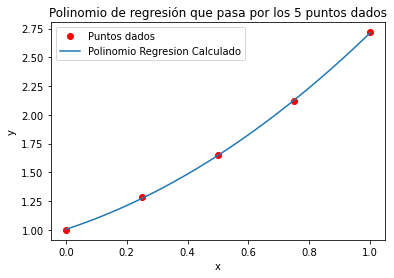

In [58]:
#Puntos por los que tiene que pasar el polinomio
plt.plot([x_1,x_2,x_3,x_4,x_5], y.flatten().tolist(), 'ro', label = 'Puntos dados')

#Evaluamos el polinomio de regresión calculado evaluandolo en x = [0,1]
pregresion = lambda x: a[0] * x**2 + a[1] * x + a[2]
x_pregresion = np.linspace(0,1,100)
y_pregresion = [pregresion(i) for i in x_pregresion]
plt.plot(x_pregresion, y_pregresion )

plt.legend(['Puntos dados', 'Polinomio Regresion Calculado'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polinomio de regresión que pasa por los 5 puntos dados')

plt.show()

### APARTADO 3